# **Principal Component Analysis (PCA)**

## 1.Dimensionality reduction 
In many datasets there are often too many features based on which the conclusion drawn. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. It can be imagined that a 2D data i.e a data having two features which are linearly dependent on each other, such data can be reduced to a single dimension. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. 

## 2. Advantages of dimensionality reduction
   1. It reduces the time and storage space required.
   
   2. Removal of multi-collinearity improves the performance of the machine-learning model.
   
   3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. 
    
## 3. Disadvantages of dimensionality reduction 

   1. It may lead to some amount of data loss.
   
   2. PCA tends to find linear correlations between variables, which is sometimes undesirable.
   
   3. PCA fails in cases where mean and covariance are not enough to define datasets.
   
   4. We may not know how many principal components to keep- in practice, some thumb rules are applied.
    
    
## 4. Principal component analysis  
Particularly, in this we need to transform variables into a new set of variables. As these are a linear combination of original variables. These new set of variables are known as principal components. Further, we need to obtain these in particular way. As first principle component accounts for the possible variation of original data. After which each succeeding component has the highest possible variance. The second principal component must be orthogonal to the first principal component. For two-dimensional dataset, there can be only two principal components. Applying PCA to your dataset loses its meaning.

## **PCA on Images**

PCA is applied on images for a number of reasons. They are:

**Number of features:** Images have huge number of features. Even a small image of 28 x 28 pixels will have 784 features to deal with.

**Lot of Covariance:** When you look at an image, it is easy to understand that if we have the values for one pixel 'p', the pixels in the vicinity of 'p' will generally have similar values.

Other fundamental reasons to apply PCA are that it **reduces memory consumption and time taken.**

## **PCA on Olivetti Images**

Let us see how we can actually apply PCA on images. We will be using the Olivetti Images dataset here.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
olive = datasets.fetch_olivetti_faces()       # Downloading the Dataset
olive.keys()


dict_keys(['data', 'images', 'target', 'DESCR'])

In [3]:
olive['data'].shape

(400, 4096)

Data contains flattenned images. Hence it is a 2D List

In [4]:
olive['images'].shape

(400, 64, 64)

Now, we will plot these images. Lets plot 64 images for now.

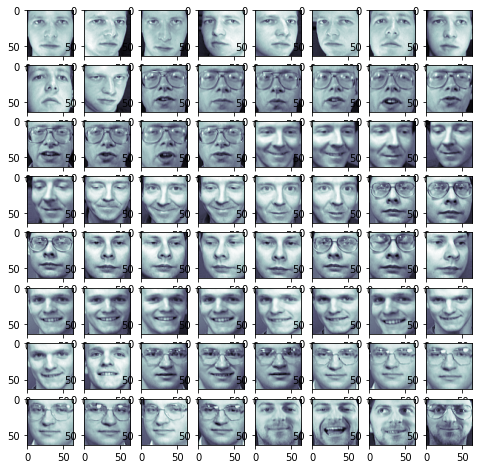

In [5]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)            # Subplot
    ax.imshow(olive.images[i],cmap = plt.cm.bone)
plt.show()

Now, we will create the PCA obejct and apply PCA

In [6]:
x = olive.data
y = olive.target
x.shape

(400, 4096)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
pca = PCA()
pca.fit(x_train)

PCA()

In [9]:
pca.components_.shape

(300, 4096)

Now, we will decide the value of 'k' on the basis of amount of variance we want to retain.

In [10]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k =k + 1
k

106

Thus, by keeping 123 components out of 4096, we shall retain 95% variance.

In [11]:
pca = PCA(n_components = k, whiten = True)
x_transformed_data = pca.fit_transform(x_train)
x_transformed_data.shape

(300, 106)

### **Reproducing the Images**

We have reduced the number of components from 4096 to 123. Now, lets try to reproduce the images, by getting the approximation from the reduced data.

In [12]:
# Using inverse_transform to get original data's approximation
x_approx = pca.inverse_transform(x_transformed_data)
x_approx.shape


(300, 4096)

In [13]:
x_approx_image = x_approx.reshape((300, 64, 64))

This data will not be the same as the original data, as after applying PCA we lose some of the original data. But lets try and plot these images and see how much difference is achieved.

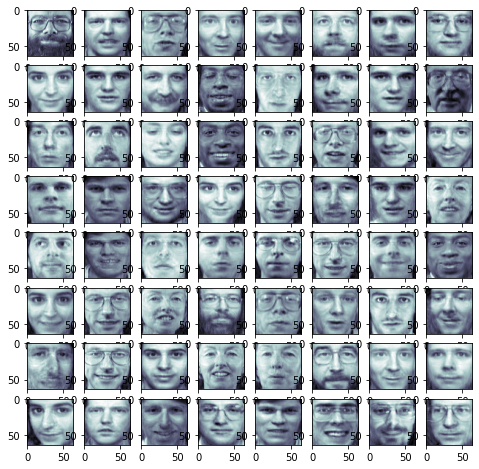

In [14]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_image[i],cmap=plt.cm.bone)
plt.show()

Wow! These images are still very recoganisable. This tells us that even after reducing the number of components by a huge number, we are able to retain a lot of imformation.

### **Model Creation**

In [15]:
x_train_pca = x_transformed_data
x_test_pca = pca.transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

### **Classification without PCA**

In [17]:
clf = RandomForestClassifier()
start = time.time()
clf.fit(x_train, y_train)
end = time.time()
y_pred = clf.predict(x_test)
print('Time: ', end - start)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Time:  1.2457897663116455
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         0
           8       1.00      0.75      0.86         4
           9       1.00      1.00      1.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       1.00      0.33      0.50         3
          16       1.00      1.00      1.00         2
 

/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### We achive an accuracy of 92%

### **Classification with PCA**

In [18]:
clf = RandomForestClassifier()
start = time.time()
clf.fit(x_train_pca, y_train)
end = time.time()
y_pred = clf.predict(x_test_pca)
print('Time: ', end - start)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Time:  0.22696614265441895
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      0.75      0.86         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         4
          14       1.00      0.67      0.80         3
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3


/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mehargupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### We achive an accuracy of 93% in lesser time